<a href="https://colab.research.google.com/github/Pawent/formation_openclassroom/blob/main/analyse_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexte de l'analyse de donnée: L'objectif est d'étudier le comportement d'investissement des Francais(Hommes et femmes).  Source de dpnnée: Kaggle

# Analyse data

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Finance_data.csv to Finance_data (1).csv


# Affichage des entêts de la data

In [9]:
df = pd.read_csv('Finance_data.csv')
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [41]:
print(df.describe())

             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  40.000000     40.000000      40.000000   40.000000         40.000000   
mean   27.800000      2.550000       3.475000    5.750000          4.650000   
std     3.560467      1.197219       1.131994    1.675617          1.369072   
min    21.000000      1.000000       1.000000    1.000000          1.000000   
25%    25.750000      2.000000       3.000000    5.000000          4.000000   
50%    27.000000      2.000000       4.000000    6.500000          5.000000   
75%    30.000000      3.000000       4.000000    7.000000          5.000000   
max    35.000000      7.000000       6.000000    7.000000          7.000000   

       Fixed_Deposits        PPF       Gold  
count       40.000000  40.000000  40.000000  
mean         3.575000   2.025000   5.975000  
std          1.795828   1.609069   1.143263  
min          1.000000   1.000000   2.000000  
25%          2.750000   1.000000   6.000000  
50%         

# Vérification de données manquantes

In [10]:
print(df.isnull().sum())

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64


#  Vérification de doublons

In [12]:
print(df.duplicated().sum())

0


In [13]:
print(df['gender'].value_counts())

gender
Male      25
Female    15
Name: count, dtype: int64


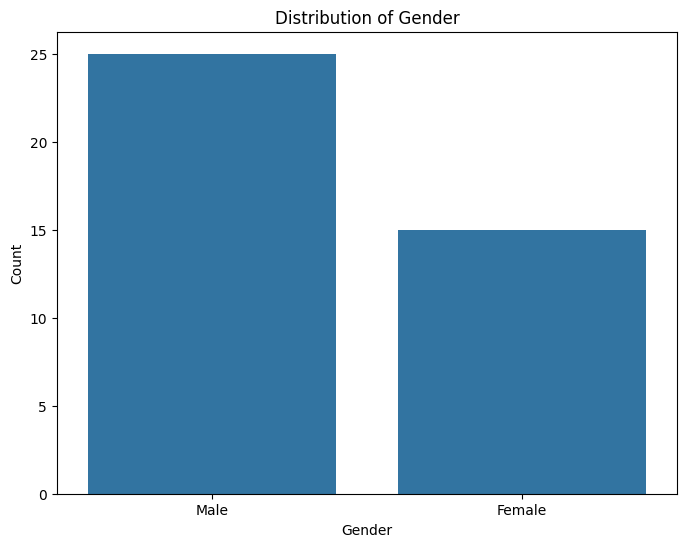

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts for each gender
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Create a bar plot of gender counts
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_counts, x='gender', y='count')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2176577665.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


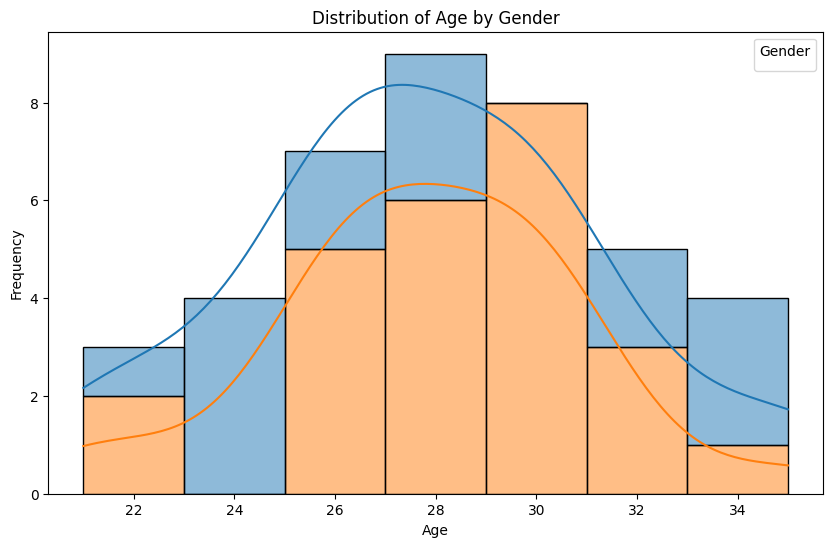

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of 'age' differentiated by 'gender'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='gender', multiple='stack', kde=True)
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()

In [19]:
print(df.groupby('gender')['Investment_Avenues'].value_counts())

gender  Investment_Avenues
Female  Yes                   12
        No                     3
Male    Yes                   25
Name: count, dtype: int64


In [20]:
print(df.groupby('gender')['Stock_Marktet'].value_counts())

gender  Stock_Marktet
Female  Yes              11
        No                4
Male    Yes              24
        No                1
Name: count, dtype: int64


In [21]:
print(df.groupby('gender')['Mutual_Funds'].value_counts())

gender  Mutual_Funds
Female  2                7
        3                3
        1                2
        4                1
        5                1
        7                1
Male    2               14
        3                6
        1                2
        4                2
        5                1
Name: count, dtype: int64


In [22]:
print(df.groupby('gender')['Equity_Market'].value_counts())

gender  Equity_Market
Female  4                 5
        3                 4
        2                 3
        1                 1
        5                 1
        6                 1
Male    4                11
        3                 8
        2                 2
        5                 2
        1                 1
        6                 1
Name: count, dtype: int64


In [23]:
print(df.groupby('gender')['Fixed_Deposits'].value_counts())

gender  Fixed_Deposits
Female  3                 4
        4                 4
        5                 4
        7                 2
        1                 1
Male    1                 7
        3                 6
        5                 4
        4                 3
        2                 2
        6                 2
        7                 1
Name: count, dtype: int64


In [24]:
print(df['What are your savings objectives?'].value_counts())

What are your savings objectives?
Retirement Plan    24
Health Care        13
Education           3
Name: count, dtype: int64


In [25]:
print(df['Reason_Mutual'].unique())

['Better Returns' 'Tax Benefits' 'Fund Diversification']


In [26]:
print(df['Factor'].unique())

['Returns' 'Locking Period' 'Risk']


In [27]:
print(df['Objective'].value_counts())

Objective
Capital Appreciation    26
Growth                  11
Income                   3
Name: count, dtype: int64


In [31]:
print(df.groupby('gender')[['age','Government_Bonds']].value_counts())

gender  age  Government_Bonds
Female  24   6                   3
        21   4                   1
        23   1                   1
        25   5                   1
        26   5                   1
        27   2                   1
        28   4                   1
             5                   1
        31   6                   1
        32   5                   1
        34   2                   1
             3                   1
        35   5                   1
Male    27   5                   4
        26   5                   2
        29   5                   2
        30   5                   2
        21   4                   1
        22   7                   1
        25   5                   1
             6                   1
        26   4                   1
        27   2                   1
             4                   1
        29   4                   1
             6                   1
             7                   1
        30   2           

In [32]:
print(df['PPF'].value_counts())

PPF
1    24
2     6
6     3
3     3
5     2
4     2
Name: count, dtype: int64


In [33]:
print(df['Fixed_Deposits'].value_counts())

Fixed_Deposits
3    10
1     8
5     8
4     7
7     3
6     2
2     2
Name: count, dtype: int64


In [34]:
print(df['Gold'].value_counts())

Gold
6    18
7    14
5     4
4     2
2     1
3     1
Name: count, dtype: int64


In [35]:
print(df['Factor'].value_counts())

Factor
Returns           25
Risk              14
Locking Period     1
Name: count, dtype: int64


In [36]:
print(df['Expect'].value_counts())

Expect
20%-30%    32
30%-40%     5
10%-20%     3
Name: count, dtype: int64


# Statistique inférentielle

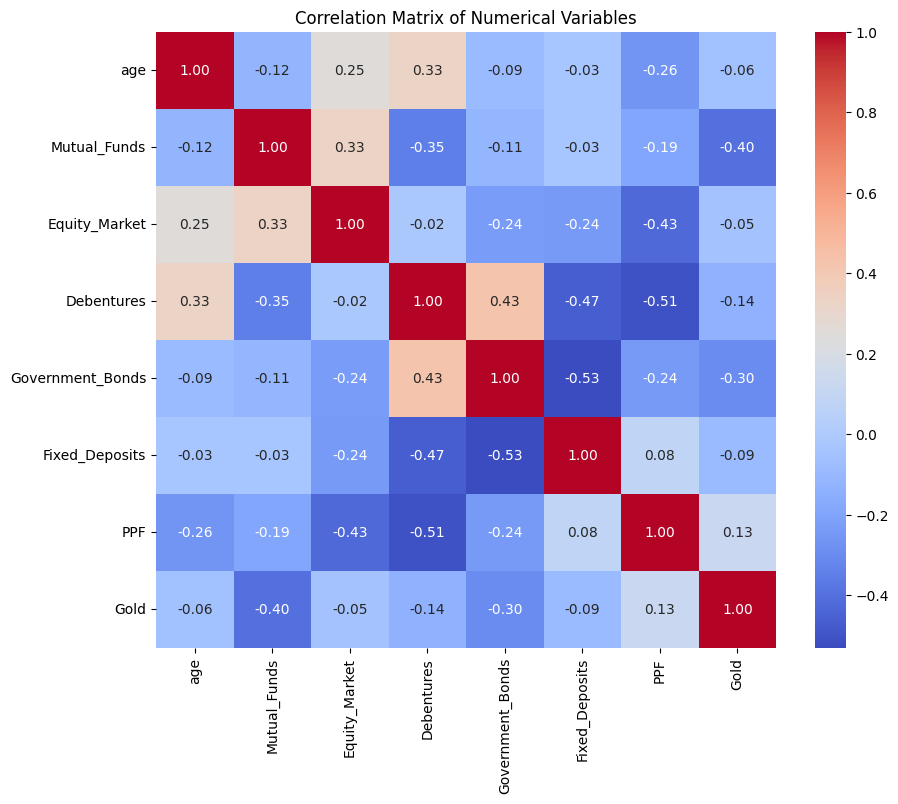

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [38]:
print(df[['age', 'Gold']].corr())

           age      Gold
age   1.000000 -0.057952
Gold -0.057952  1.000000


In [39]:
print(df[['age', 'Fixed_Deposits']].corr())

                     age  Fixed_Deposits
age             1.000000       -0.033685
Fixed_Deposits -0.033685        1.000000


In [40]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df['gender'], df['Investment_Avenues'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n{expected}")

Chi-squared statistic: 2.9069069069069067
P-value: 0.08820088356567414
Degrees of freedom: 1
Expected frequencies: 
[[ 1.125 13.875]
 [ 1.875 23.125]]
